In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [2]:

#Removes non numerical columns
df.dropna()
p = df.drop(['species', 'island'], axis=1)
p.info() # 2 null entries left
p # 3 and 339

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                334 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
p = p.drop([3,339])

In [8]:
# Change sex to 0 and 1 and more to make sure pca can work
# male is 0 and female is 1, remove all NaN and .s
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(p['sex'])

# found NaNs and .s at rows: 8,9,10,11,47,246,324,336

0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
6      FEMALE
7        MALE
8         NaN
9         NaN
10        NaN
11        NaN
12     FEMALE
13       MALE
14       MALE
15     FEMALE
16     FEMALE
17       MALE
18     FEMALE
19       MALE
20     FEMALE
21       MALE
22     FEMALE
23       MALE
24       MALE
25     FEMALE
26       MALE
27     FEMALE
28     FEMALE
29       MALE
30     FEMALE
31       MALE
32     FEMALE
33       MALE
34     FEMALE
35       MALE
36       MALE
37     FEMALE
38     FEMALE
39       MALE
40     FEMALE
41       MALE
42     FEMALE
43       MALE
44     FEMALE
45       MALE
46       MALE
47        NaN
48     FEMALE
49       MALE
50     FEMALE
51       MALE
52     FEMALE
53       MALE
54     FEMALE
55       MALE
56     FEMALE
57       MALE
58     FEMALE
59       MALE
60     FEMALE
61       MALE
62     FEMALE
63       MALE
64     FEMALE
65       MALE
66     FEMALE
67       MALE
68     FEMALE
69       MALE
70     FEMALE
71       MALE
72    

In [9]:
p = p.drop([8,9,10,11,47,246,324,336])

In [10]:
p['sex'].nunique()

2

In [13]:
# do that change to binary
p['sex'] = pd.factorize(p['sex'])[0]
p

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,1


In [14]:
# Code pulled from and inspired by 
# https://github.com/bphall/pca_sandbox/blob/master/pca_sandbox.ipynb
x = p.values
x_scale = StandardScaler().fit_transform(x)
x_scale

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scale)
principalComponents

pca2_df = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])
pca2_df

,pca1,pca2
0,-1.589291,-1.177838
1,-1.524566,0.719303
2,-1.575324,0.591176
3,-2.044832,0.251716
4,-1.601764,-1.743723
...,...,...
329,1.666441,1.797722
330,1.518858,1.624644
331,2.916831,-0.416985
332,1.418490,1.468511


[Text(0.5, 0, 'Principal Component 1'),
 Text(0, 0.5, 'Principal Component 2'),
 Text(0.5, 1.0, 'Penguin Species Size and Mass')]

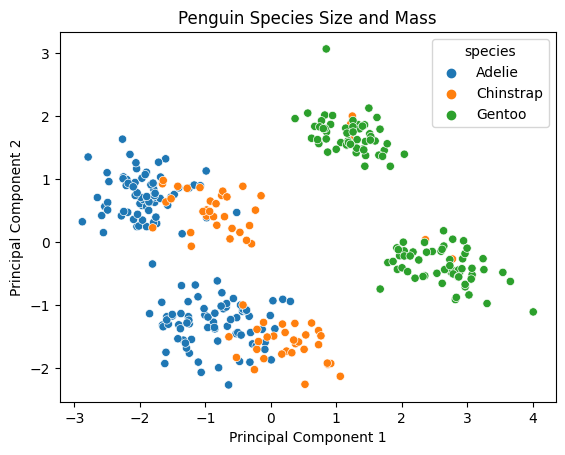

In [15]:
# Plotting
ax = sns.scatterplot(x=pca2_df.pca1, y=pca2_df.pca2, hue=df.species)
ax.set(xlabel='Principal Component 1',ylabel='Principal Component 2',title='Penguin Species Size and Mass')